In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd. set_option('display.max_rows', 500)

In [3]:
# Read the csv files

df_applications = pd.read_csv('application_data.csv')
df_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_previous_applications = pd.read_csv('previous_application.csv')
df_previous_applications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df_applications.shape)
print(df_previous_applications.shape)

(307511, 122)
(1670214, 37)


In [6]:
print(df_applications.info(verbose=True,null_counts=True))
print()
print(df_previous_applications.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Find percentage of missing values in applications csv file

print(df_applications.isnull().sum()/len(df_applications)*100)
print()
print(df_previous_applications.isnull().sum()/len(df_previous_applications)*100)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
# As we can see there are column with more than 40% of missing values so it's better to drop them

Missing_Columns=list(df_applications.columns[df_applications.isnull().sum()/len(df_applications)*100 >= 40.00])
df_applications.drop(columns=Missing_Columns,axis=1,inplace=True)

Missing_Columns=list(df_previous_applications.columns[df_previous_applications.isnull().sum()/len(df_previous_applications)*100 >= 40.00])
df_previous_applications.drop(columns=Missing_Columns,axis=1,inplace=True)

In [9]:
#Checking Shape of DataFrames after dropping

print(df_applications.shape)
print(df_previous_applications.shape)

(307511, 73)
(1670214, 26)


In [10]:
df_applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_previous_applications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [12]:
#There are some columns with unnecessary/incomplete Information. So, Dropping them

un_columns=df_applications.columns[df_applications.columns.str.contains('FLAG_DOCUMENT|EXT_SOURCE')]
un_columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [13]:
df_applications.drop(columns=un_columns,axis=1,inplace=True)

In [14]:
#Checking Shape of DataFrame after dropping

print(df_applications.shape)
print(df_applications.info())

(307511, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null 

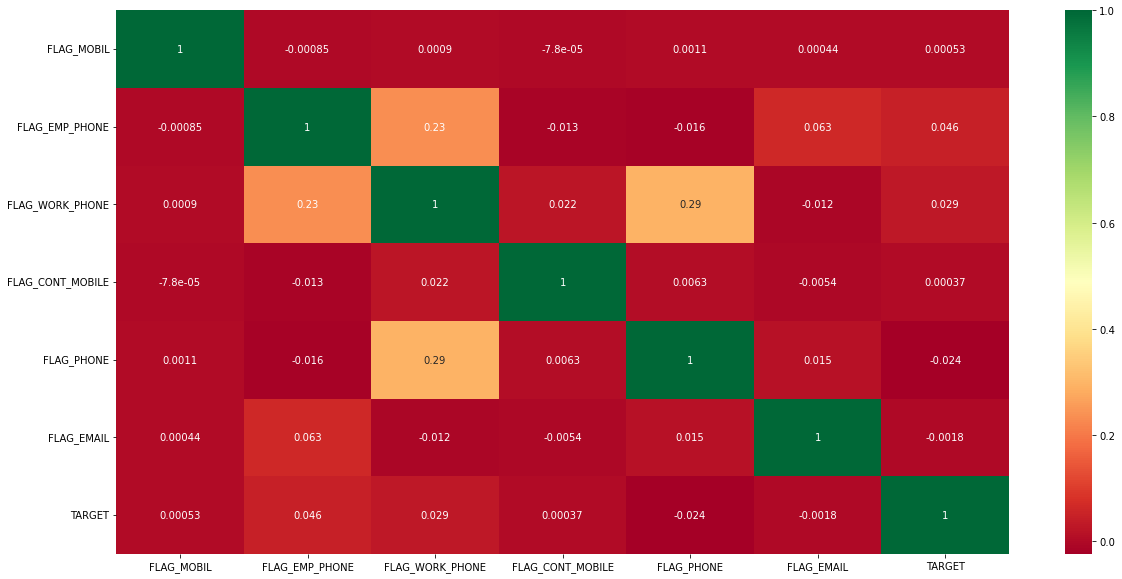

In [15]:
#Checking Correlation of FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL columns with Target Variable

plt.figure(figsize=(20,10))

cols=df_applications[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']]
cor = df_applications[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']].corr()
sns.heatmap(cor,cmap='RdYlGn',annot=True)
plt.show()

In [16]:
#As there is no correclation. Dropping the columns

df_applications.drop(columns=cols,axis=1,inplace=True)
df_applications.shape

(307511, 45)

In [17]:
#Let's Check Missing Values again

print(df_applications.isnull().sum()/len(df_applications)*100)
print()
print(df_previous_applications.isnull().sum()/len(df_previous_applications)*100)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [18]:
#As we can see there are some columns with 13 % or more Missing values so let's impute them

print(df_applications.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100)
print(df_applications.AMT_REQ_CREDIT_BUREAU_HOUR.mean(), df_applications.AMT_REQ_CREDIT_BUREAU_HOUR.median())

# Mean and Median is almost the same so let's impute with mean

df_applications.AMT_REQ_CREDIT_BUREAU_HOUR = df_applications.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_applications.AMT_REQ_CREDIT_BUREAU_HOUR.mean())
print()
print(df_applications.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0.006402448193930645 0.0

0


In [19]:
print(df_applications.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100)
print(df_applications.AMT_REQ_CREDIT_BUREAU_DAY.mean(), df_applications.AMT_REQ_CREDIT_BUREAU_DAY.median())

# Mean and Median is almost the same so let's impute with mean

df_applications.AMT_REQ_CREDIT_BUREAU_DAY = df_applications.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_applications.AMT_REQ_CREDIT_BUREAU_DAY.mean())
print()
print(df_applications.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0.0070002105326475985 0.0

0


In [20]:
print(df_applications.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100)
print(df_applications.AMT_REQ_CREDIT_BUREAU_WEEK.mean(), df_applications.AMT_REQ_CREDIT_BUREAU_WEEK.median())

# Mean and Median is almost the same so let's impute with mean

df_applications.AMT_REQ_CREDIT_BUREAU_WEEK = df_applications.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_applications.AMT_REQ_CREDIT_BUREAU_WEEK.mean())
print()
print(df_applications.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum())

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0.0343619356973142 0.0

0


In [21]:
print(df_applications.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100)
print(df_applications.AMT_REQ_CREDIT_BUREAU_MON.mean(), df_applications.AMT_REQ_CREDIT_BUREAU_MON.median())

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0.26739526000781977 0.0


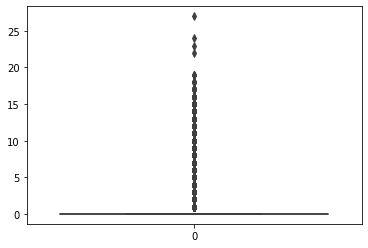

In [22]:
# Let's check Outliers for AMT_REQ_CREDIT_BUREAU_MON Column

sns.boxplot(data=df_applications.AMT_REQ_CREDIT_BUREAU_MON)
plt.show()

In [23]:
# As Mean is affected by Outliers. It's better to impute with Median

df_applications.AMT_REQ_CREDIT_BUREAU_MON = df_applications.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_applications.AMT_REQ_CREDIT_BUREAU_MON.median())
print()
print(df_applications.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum())


0


In [24]:
print(df_applications.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100)
print(df_applications.AMT_REQ_CREDIT_BUREAU_QRT.mean(), df_applications.AMT_REQ_CREDIT_BUREAU_QRT.median())

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0.26547414959848414 0.0


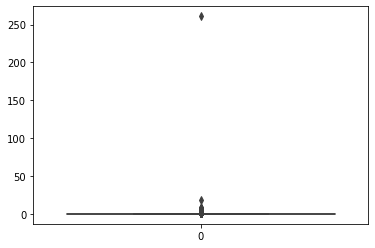

In [25]:
# Let's check Outliers for AMT_REQ_CREDIT_BUREAU_MON Column

sns.boxplot(data=df_applications.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

In [26]:
# As Mean is affected by Outliers. It's better to impute with Median

df_applications.AMT_REQ_CREDIT_BUREAU_QRT = df_applications.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_applications.AMT_REQ_CREDIT_BUREAU_QRT.median())
print()
print(df_applications.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum())


0


In [27]:
print(df_applications.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100)
print(df_applications.AMT_REQ_CREDIT_BUREAU_YEAR.mean(), df_applications.AMT_REQ_CREDIT_BUREAU_YEAR.median())

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
1.899974435321363 1.0


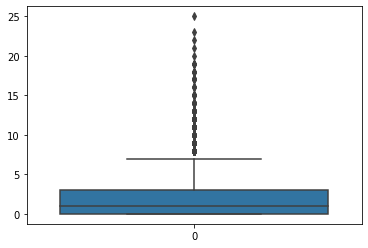

In [28]:
# Let's check Outliers for AMT_REQ_CREDIT_BUREAU_MON Column

sns.boxplot(data=df_applications.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [29]:
# As Mean is affected by Outliers. It's better to impute with Median

df_applications.AMT_REQ_CREDIT_BUREAU_YEAR = df_applications.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_applications.AMT_REQ_CREDIT_BUREAU_YEAR.median())
print()
print(df_applications.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum())


0


In [30]:
df_applications.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [31]:
print(df_applications.OCCUPATION_TYPE.isnull().sum())
print(df_applications.OCCUPATION_TYPE.mode())

96391
0    Laborers
dtype: object


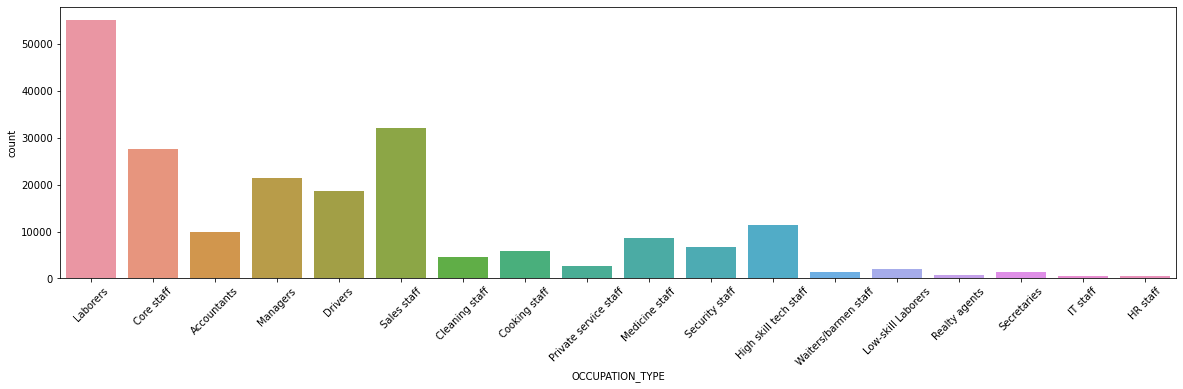

In [32]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.countplot(x=df_applications.OCCUPATION_TYPE)
plt.show()

In [33]:
#As we can see there are higher number of Laborers in OCCUPATION_TYPE VAriable. It would be good to impute with that value.

# df_applications.OCCUPATION_TYPE = df_applications.OCCUPATION_TYPE.fillna(df_applications.OCCUPATION_TYPE.mode())
# print(df_applications.OCCUPATION_TYPE.isnull().sum())

In [34]:
# We can see these variable have -ve value. Let's change them to positive.
print(df_applications.DAYS_BIRTH.value_counts())
print(df_applications.DAYS_EMPLOYED.value_counts())
print(df_applications.DAYS_ID_PUBLISH.value_counts())
print(df_applications.DAYS_LAST_PHONE_CHANGE.value_counts())
print(df_applications.DAYS_REGISTRATION.value_counts())

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64
 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64
-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0  

In [35]:
df_applications.DAYS_BIRTH = abs(df_applications.DAYS_BIRTH)
df_applications.DAYS_EMPLOYED = abs(df_applications.DAYS_EMPLOYED)
df_applications.DAYS_ID_PUBLISH = abs(df_applications.DAYS_ID_PUBLISH)
df_applications.DAYS_LAST_PHONE_CHANGE = abs(df_applications.DAYS_LAST_PHONE_CHANGE)
df_applications.DAYS_REGISTRATION = abs(df_applications.DAYS_REGISTRATION)

In [36]:
# Let's change no. of days to readable integer number

df_applications.DAYS_BIRTH = df_applications.DAYS_BIRTH//365
df_applications.DAYS_EMPLOYED = df_applications.DAYS_EMPLOYED//365

In [37]:
df_applications.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [38]:
# Let's change datatype float to int for some columns as required.

Cols_DataType_Change=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'
,'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON'
,'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for x in Cols_DataType_Change:
    df_applications[f'{x}'] = df_applications[f'{x}'].astype('int',errors='ignore')

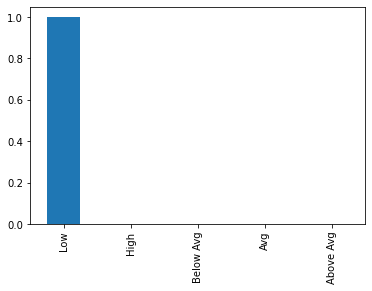

In [39]:
# Binning Continous Varibale

pd.cut(df_applications.AMT_INCOME_TOTAL,bins=5,
       labels=['Low','Below Avg','Avg','Above Avg','High']).value_counts(normalize=True).plot(kind='bar')
plt.show()

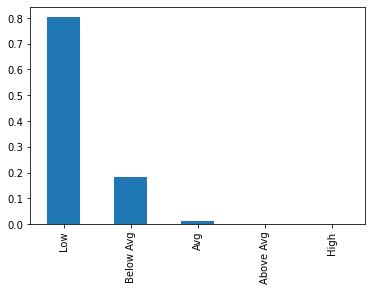

In [40]:
pd.cut(df_applications.AMT_GOODS_PRICE,bins=5,
       labels=['Low','Below Avg','Avg','Above Avg','High']).value_counts(normalize=True).plot(kind='bar')
plt.show()

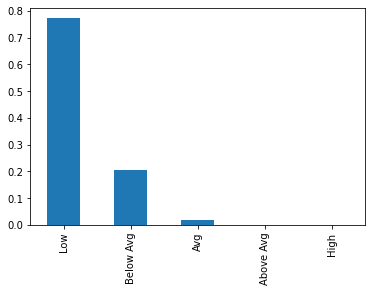

In [41]:
pd.cut(df_applications.AMT_CREDIT,bins=5,
       labels=['Low','Below Avg','Avg','Above Avg','High']).value_counts(normalize=True).plot(kind='bar')
plt.show()

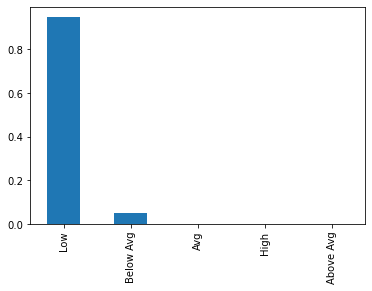

In [42]:
pd.cut(df_applications.AMT_ANNUITY,bins=5,
       labels=['Low','Below Avg','Avg','Above Avg','High']).value_counts(normalize=True).plot(kind='bar')
plt.show()

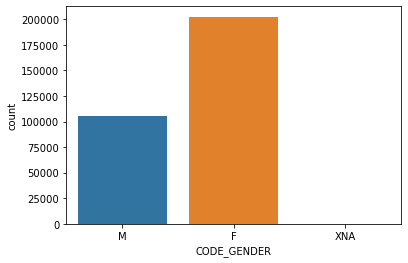

In [43]:
sns.countplot(x=df_applications.CODE_GENDER)
plt.show()

In [44]:
df_applications.drop(df_applications[df_applications['CODE_GENDER']=='XNA'].index,inplace=True)

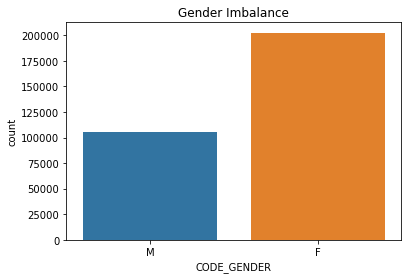

In [45]:
sns.countplot(x=df_applications.CODE_GENDER)
plt.title('Gender Imbalance')
plt.show()

In [46]:
#Let's find the Balance in the DataFrame
df_applications.TARGET.value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

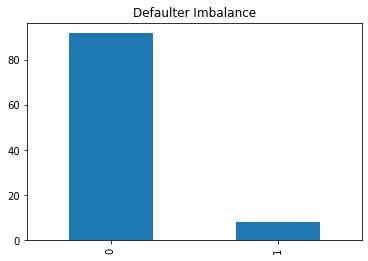

In [47]:
round(df_applications.TARGET.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Defaulter Imbalance')
plt.show()

In [48]:
# Dividing Defaulter and Non Defaulter into two different DataFrames

df_applications_0 = df_applications[df_applications.TARGET==0]
df_applications_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,828.0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,815.0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,617.0,0,0,0,0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,1106.0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,2536.0,0,0,0,0,1,1


In [49]:
df_applications_1 = df_applications[df_applications.TARGET==1]
df_applications_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,1134.0,0,0,0,0,0,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,1.0,10.0,0.0,161.0,0,0,0,0,2,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,1075.0,0,0,0,2,0,4
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0.0,1.0,0.0,1480.0,0,0,0,0,0,2
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,1.0,0.0,0,0,0,0,0,0


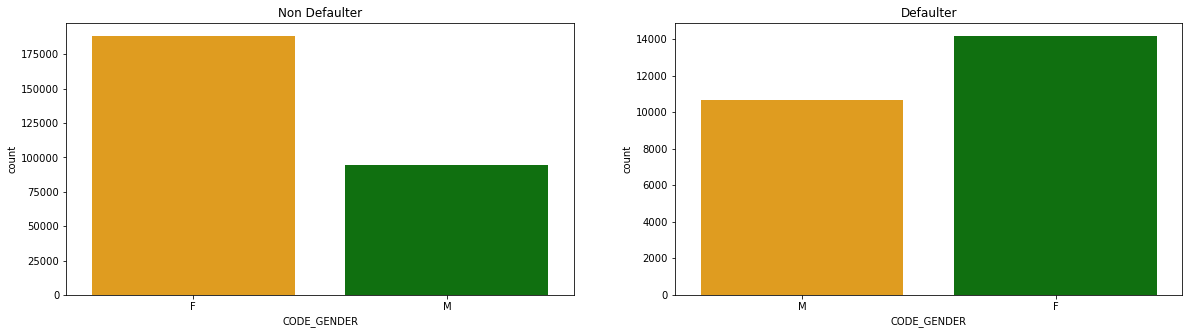

In [50]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='CODE_GENDER',data=df_applications_0,palette=['orange','green'])

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='CODE_GENDER',data=df_applications_1,palette=['orange','green'])

plt.show()

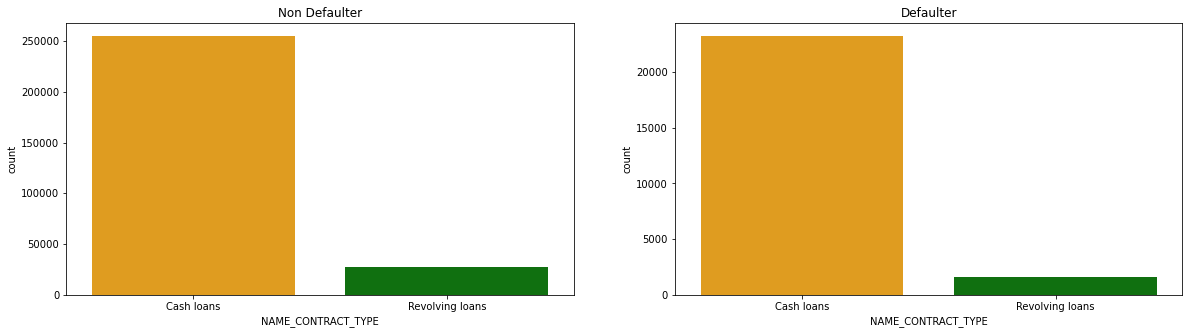

In [51]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='NAME_CONTRACT_TYPE',data=df_applications_0,palette=['orange','green'])

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='NAME_CONTRACT_TYPE',data=df_applications_1,palette=['orange','green'])

plt.show()

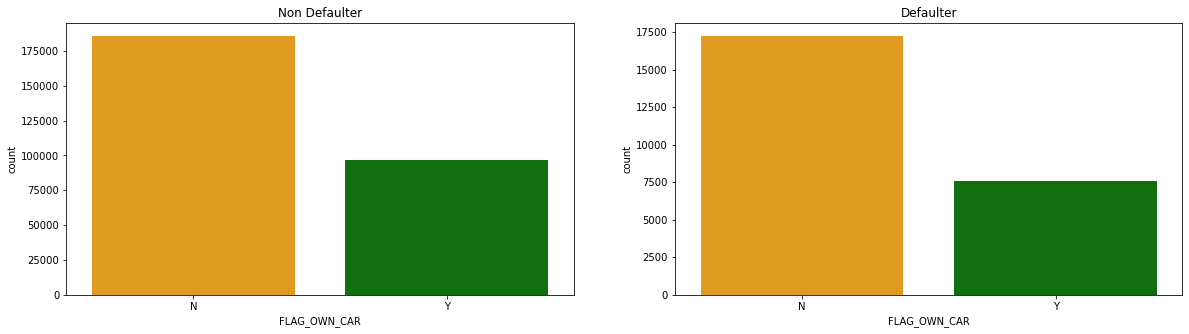

In [52]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='FLAG_OWN_CAR',data=df_applications_0,palette=['orange','green'])

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='FLAG_OWN_CAR',data=df_applications_1,palette=['orange','green'])

plt.show()

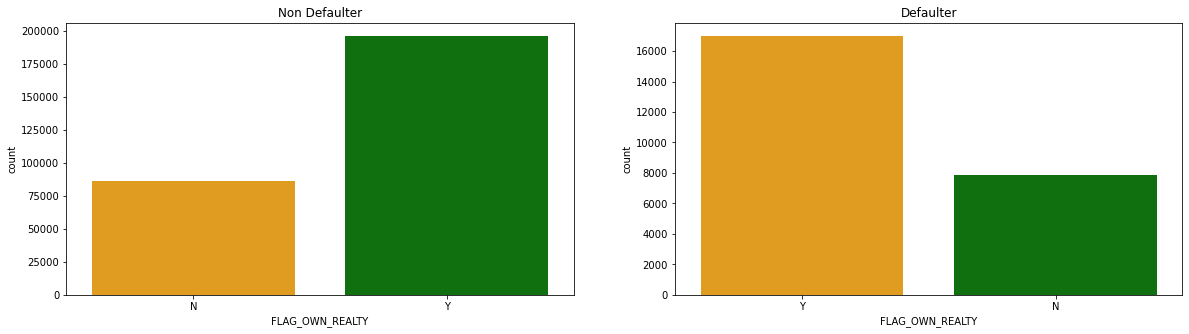

In [53]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='FLAG_OWN_REALTY',data=df_applications_0,palette=['orange','green'])

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='FLAG_OWN_REALTY',data=df_applications_1,palette=['orange','green'])

plt.show()

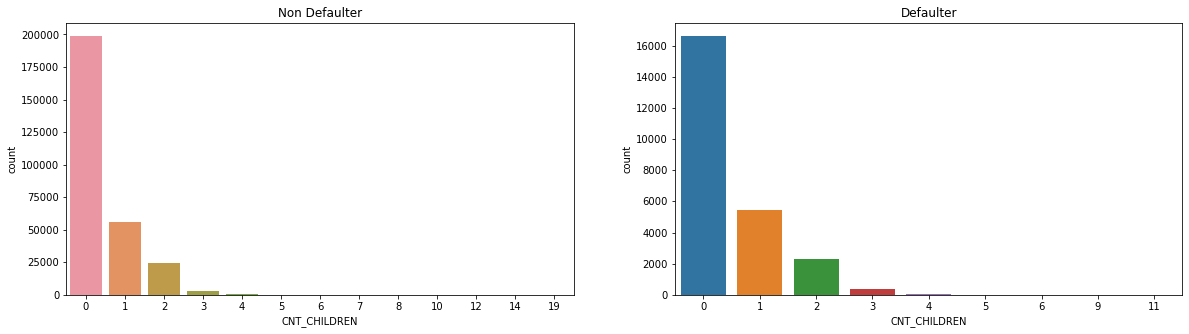

In [54]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='CNT_CHILDREN',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='CNT_CHILDREN',data=df_applications_1)

plt.show()

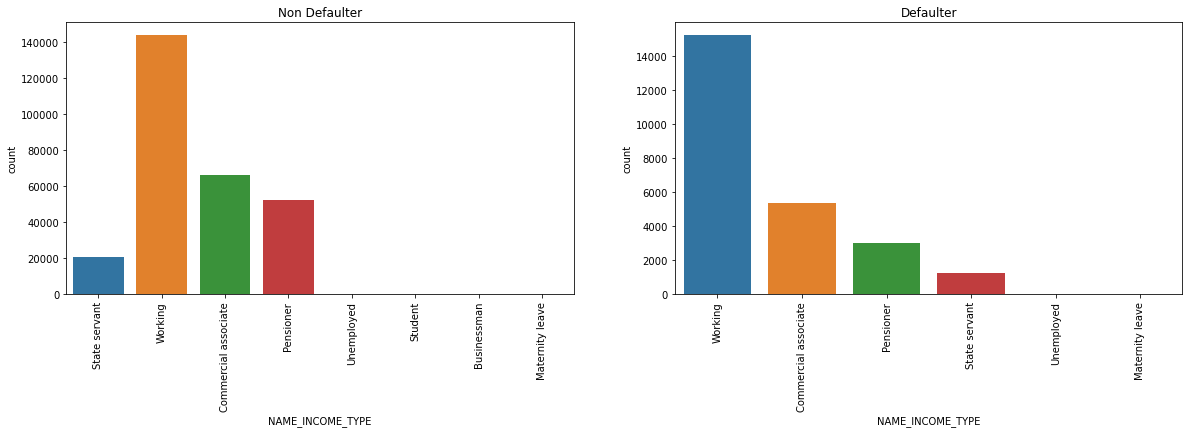

In [55]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_INCOME_TYPE',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_INCOME_TYPE',data=df_applications_1)

plt.show()

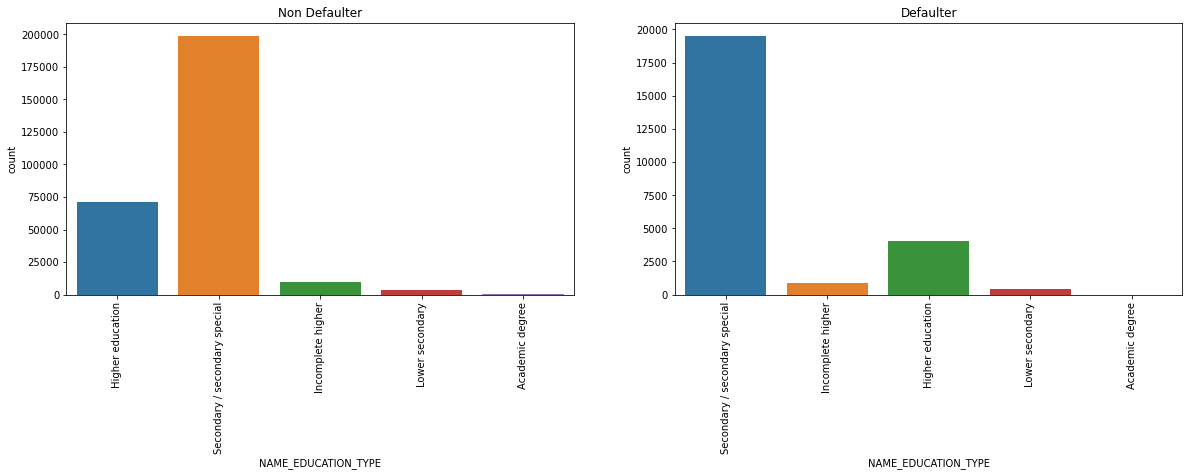

In [56]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_EDUCATION_TYPE',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_EDUCATION_TYPE',data=df_applications_1)

plt.show()

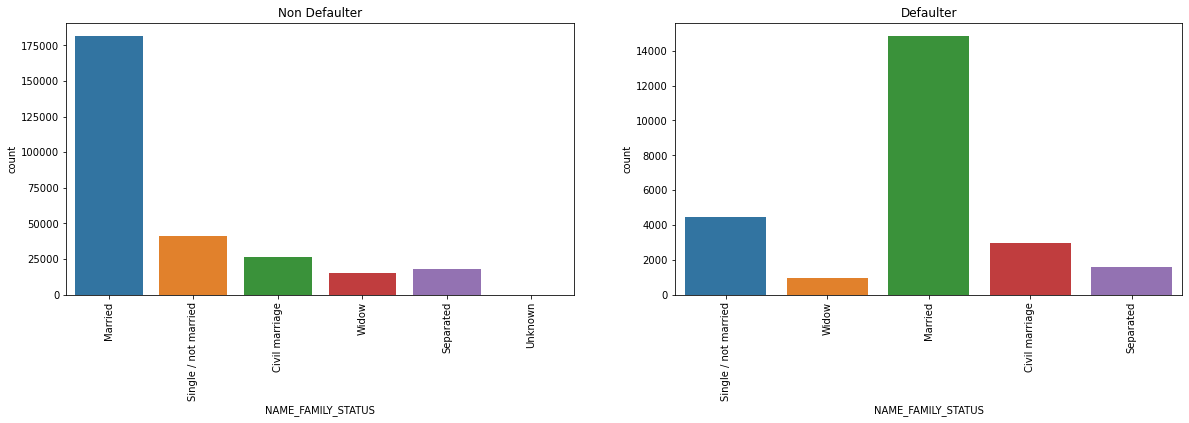

In [57]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_FAMILY_STATUS',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_FAMILY_STATUS',data=df_applications_1)

plt.show()

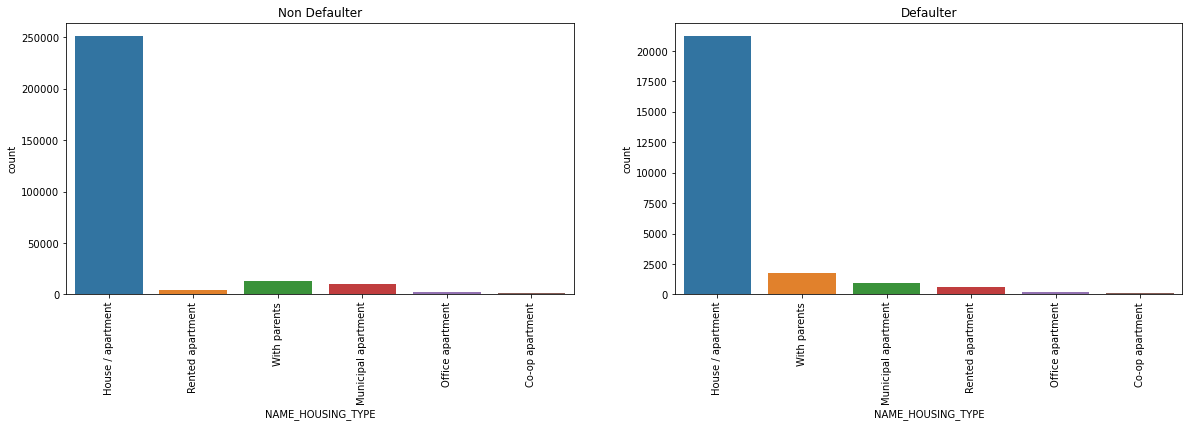

In [58]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_HOUSING_TYPE',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)  
sns.countplot(x='NAME_HOUSING_TYPE',data=df_applications_1)

plt.show()

In [59]:
df_applications_0['AMT_INCOME_TOTAL_GROUP'] = pd.cut(df_applications_0.AMT_INCOME_TOTAL,
                                                     bins=np.linspace(min(df_applications_0.AMT_INCOME_TOTAL), 
                                                                      max(df_applications_0.AMT_INCOME_TOTAL),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)
df_applications_1['AMT_INCOME_TOTAL_GROUP'] = pd.cut(df_applications_1.AMT_INCOME_TOTAL,
                                                     bins=np.linspace(min(df_applications_1.AMT_INCOME_TOTAL), 
                                                                      max(df_applications_1.AMT_INCOME_TOTAL),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)

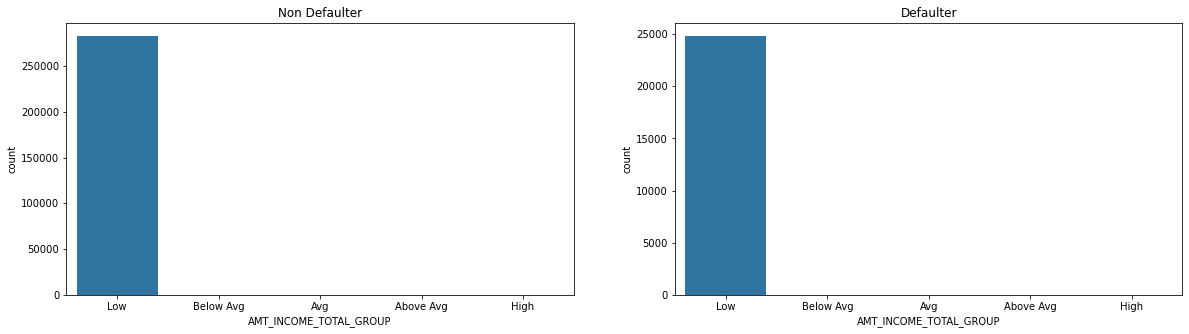

In [60]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='AMT_INCOME_TOTAL_GROUP',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='AMT_INCOME_TOTAL_GROUP',data=df_applications_1)

plt.show()

In [61]:
df_applications_0['AMT_GOODS_PRICE_GROUP'] = pd.cut(df_applications_0.AMT_GOODS_PRICE,
                                                     bins=np.linspace(min(df_applications_0.AMT_GOODS_PRICE), 
                                                                      max(df_applications_0.AMT_GOODS_PRICE),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)
df_applications_1['AMT_GOODS_PRICE_GROUP'] = pd.cut(df_applications_1.AMT_GOODS_PRICE,
                                                     bins=np.linspace(min(df_applications_1.AMT_GOODS_PRICE), 
                                                                      max(df_applications_1.AMT_GOODS_PRICE),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)

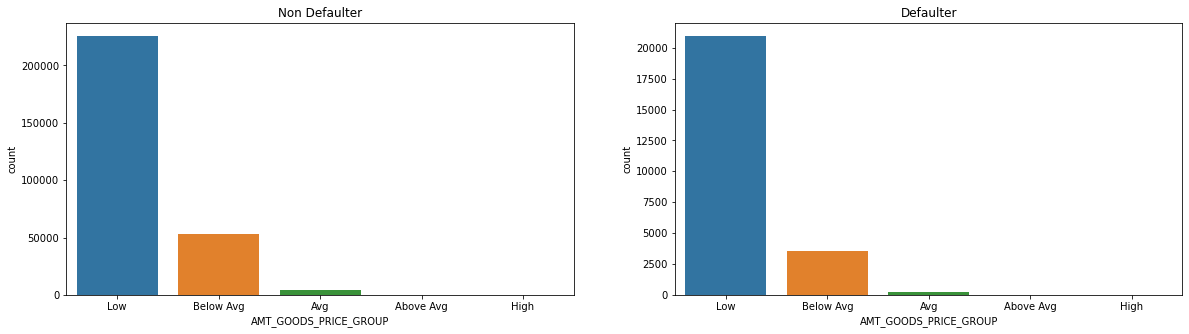

In [62]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='AMT_GOODS_PRICE_GROUP',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='AMT_GOODS_PRICE_GROUP',data=df_applications_1)

plt.show()

In [63]:
df_applications_0['AMT_CREDIT_GROUP'] = pd.cut(df_applications_0.AMT_CREDIT,
                                                     bins=np.linspace(min(df_applications_0.AMT_CREDIT), 
                                                                      max(df_applications_0.AMT_CREDIT),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)
df_applications_1['AMT_CREDIT_GROUP'] = pd.cut(df_applications_1.AMT_CREDIT,
                                                     bins=np.linspace(min(df_applications_1.AMT_CREDIT), 
                                                                      max(df_applications_1.AMT_CREDIT),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)

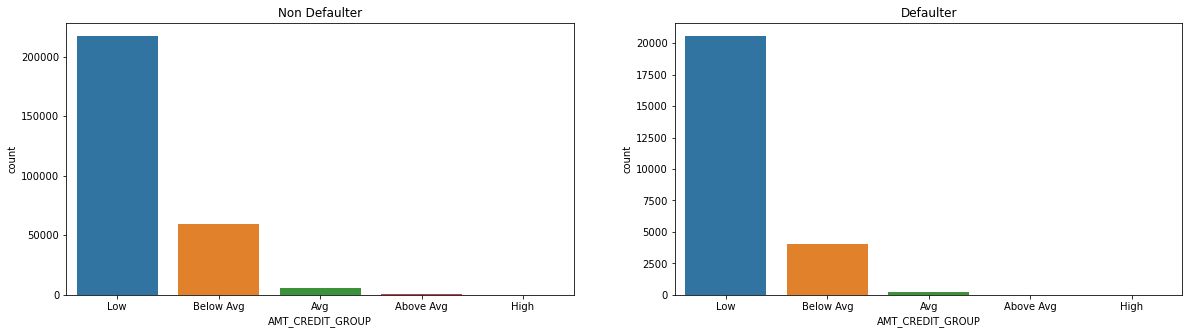

In [64]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='AMT_CREDIT_GROUP',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='AMT_CREDIT_GROUP',data=df_applications_1)

plt.show()

In [65]:
df_applications_0['AMT_ANNUITY_GROUP'] = pd.cut(df_applications_0.AMT_ANNUITY,
                                                     bins=np.linspace(min(df_applications_0.AMT_ANNUITY), 
                                                                      max(df_applications_0.AMT_ANNUITY),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)
df_applications_1['AMT_ANNUITY_GROUP'] = pd.cut(df_applications_1.AMT_ANNUITY,
                                                     bins=np.linspace(min(df_applications_1.AMT_ANNUITY), 
                                                                      max(df_applications_1.AMT_ANNUITY),6)
                                                                      ,labels = ['Low','Below Avg','Avg','Above Avg','High']
                                                                      ,include_lowest = True)

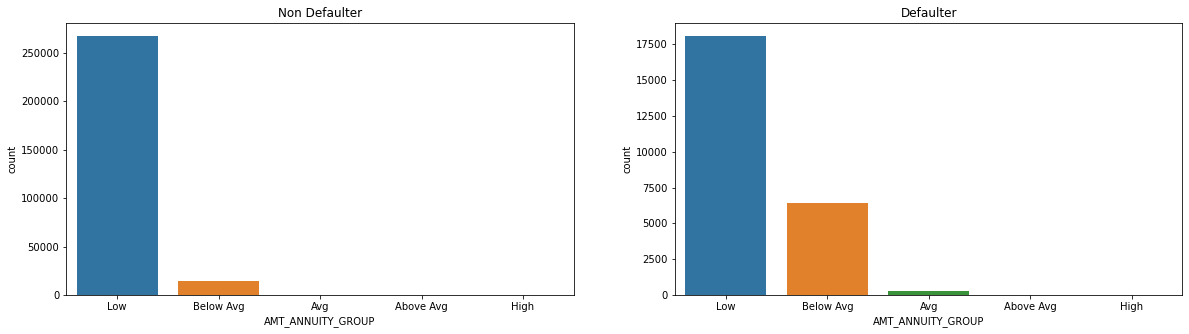

In [66]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='AMT_ANNUITY_GROUP',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='AMT_ANNUITY_GROUP',data=df_applications_1)

plt.show()

In [67]:
df_applications_0['AGE_GROUP'] = pd.cut(df_applications_0.DAYS_BIRTH,
                                                     bins=np.linspace(min(df_applications_0.DAYS_BIRTH), 
                                                                      max(df_applications_0.DAYS_BIRTH),6)
                                                                      ,labels = ['20-30','30-40','40-50','50-60','60-70']
                                                                      ,include_lowest = True)
df_applications_1['AGE_GROUP'] = pd.cut(df_applications_1.DAYS_BIRTH,
                                                     bins=np.linspace(min(df_applications_1.DAYS_BIRTH), 
                                                                      max(df_applications_1.DAYS_BIRTH),6)
                                                                      ,labels = ['20-30','30-40','40-50','50-60','60-70']
                                                                      ,include_lowest = True)

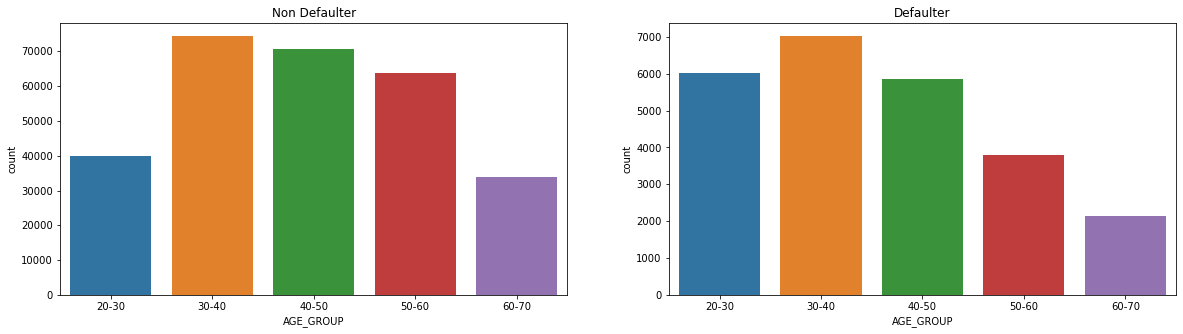

In [68]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
sns.countplot(x='AGE_GROUP',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
sns.countplot(x='AGE_GROUP',data=df_applications_1)

plt.show()

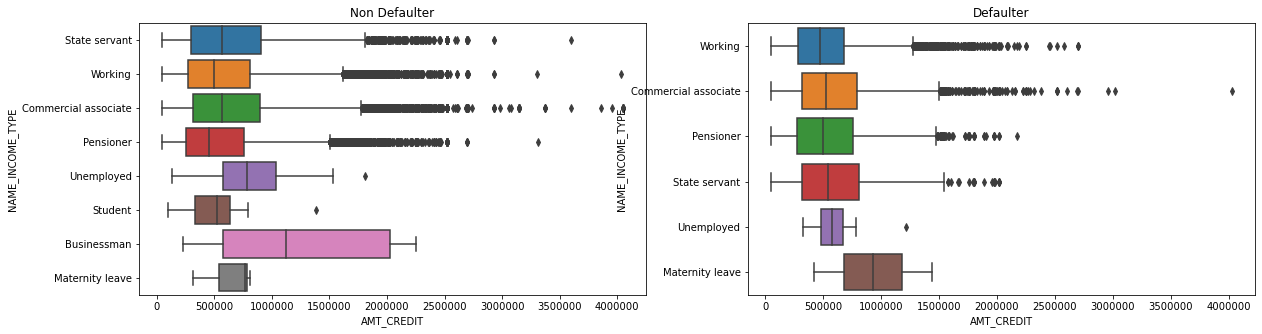

In [69]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x='AMT_CREDIT',y='NAME_INCOME_TYPE',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x='AMT_CREDIT',y='NAME_INCOME_TYPE',data=df_applications_1)

plt.show()

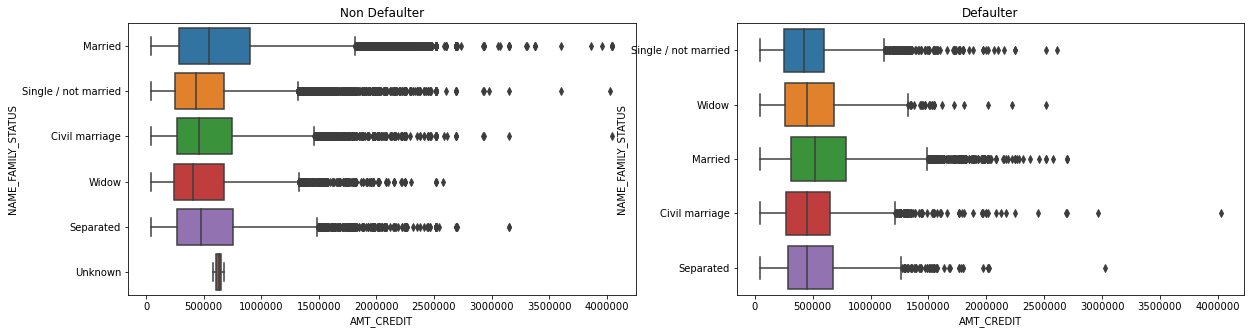

In [70]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x='AMT_CREDIT',y='NAME_FAMILY_STATUS',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x='AMT_CREDIT',y='NAME_FAMILY_STATUS',data=df_applications_1)

plt.show()

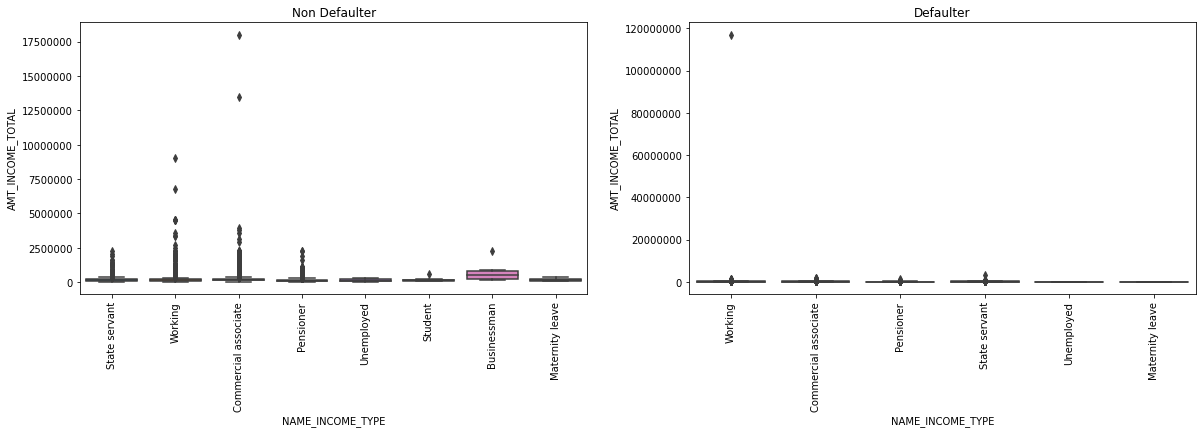

In [71]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data=df_applications_1)

plt.show()

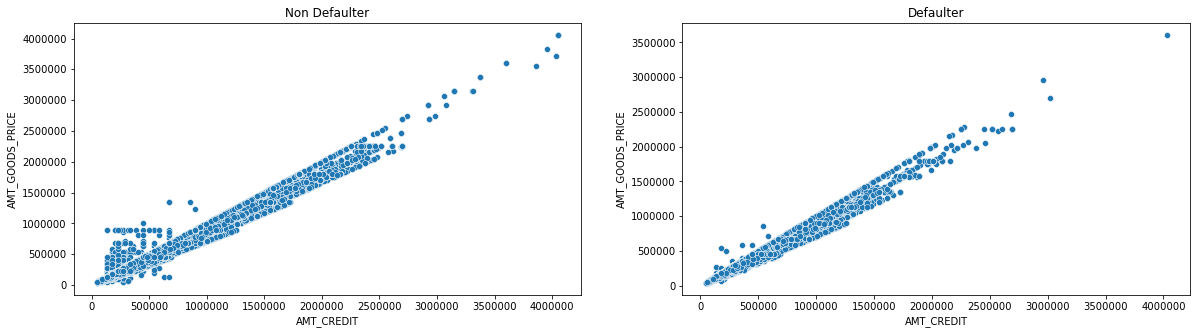

In [72]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=df_applications_1)

plt.show()

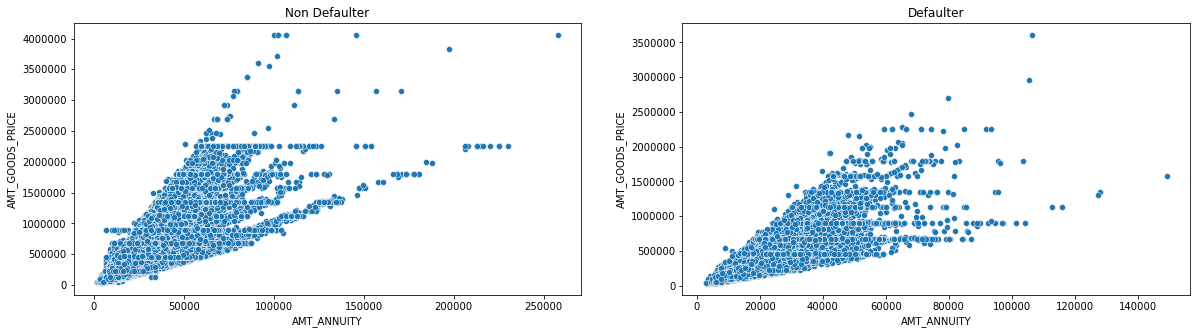

In [73]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=df_applications_0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=df_applications_1)

plt.show()

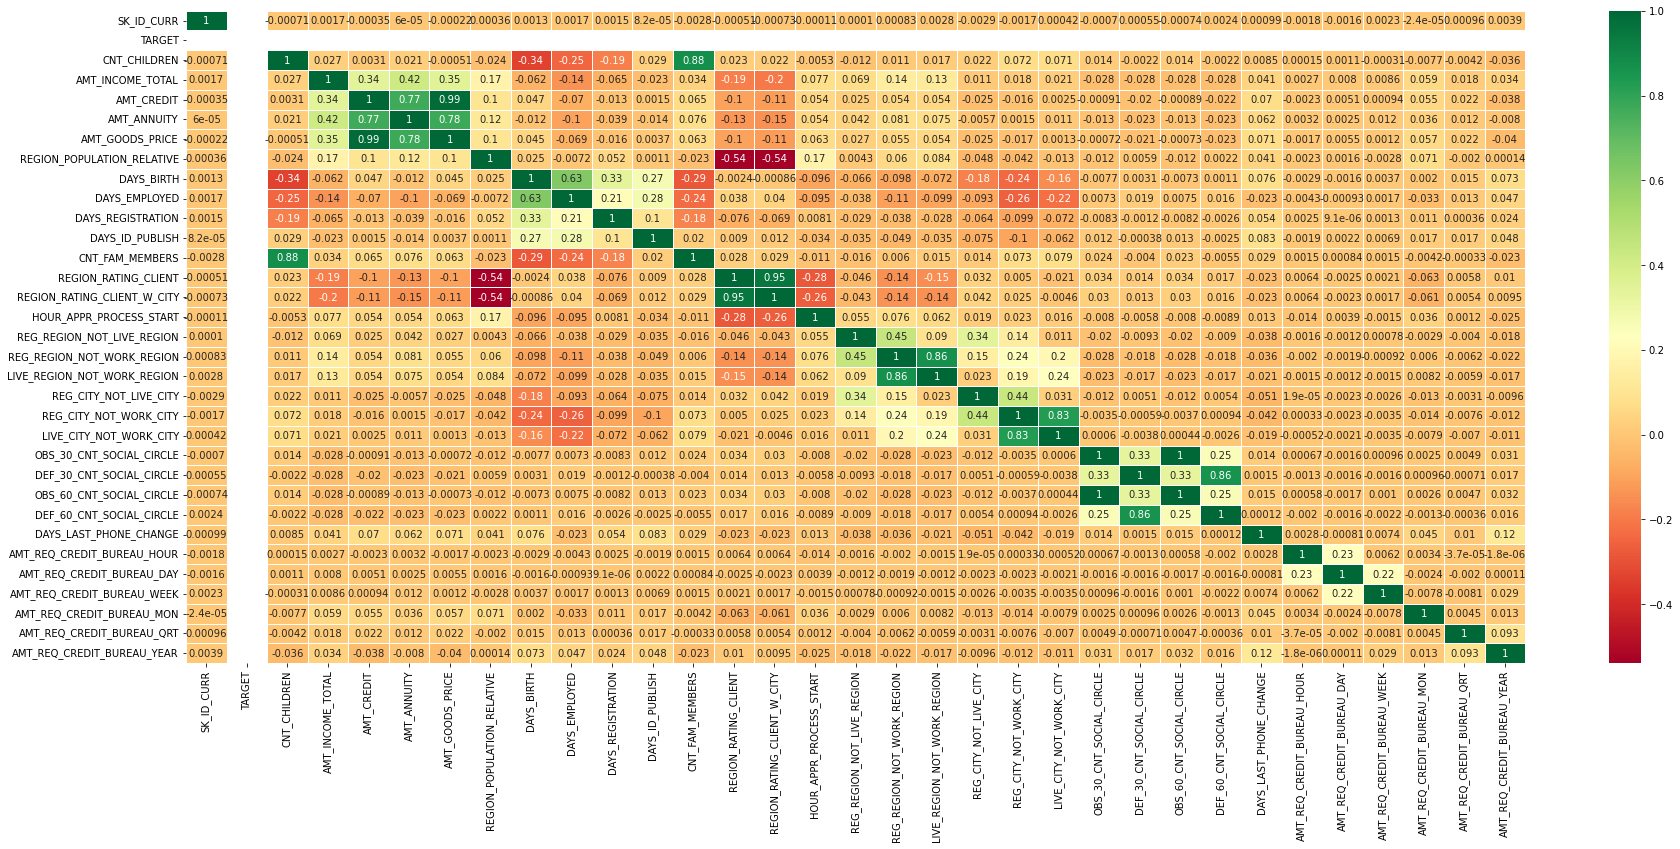

In [74]:
#Correlation of all variables in the data set 

plt.figure(figsize=(30,12))
sns.heatmap(df_applications_0.corr(),annot=True,cmap='RdYlGn',linewidths=1)
plt.show()

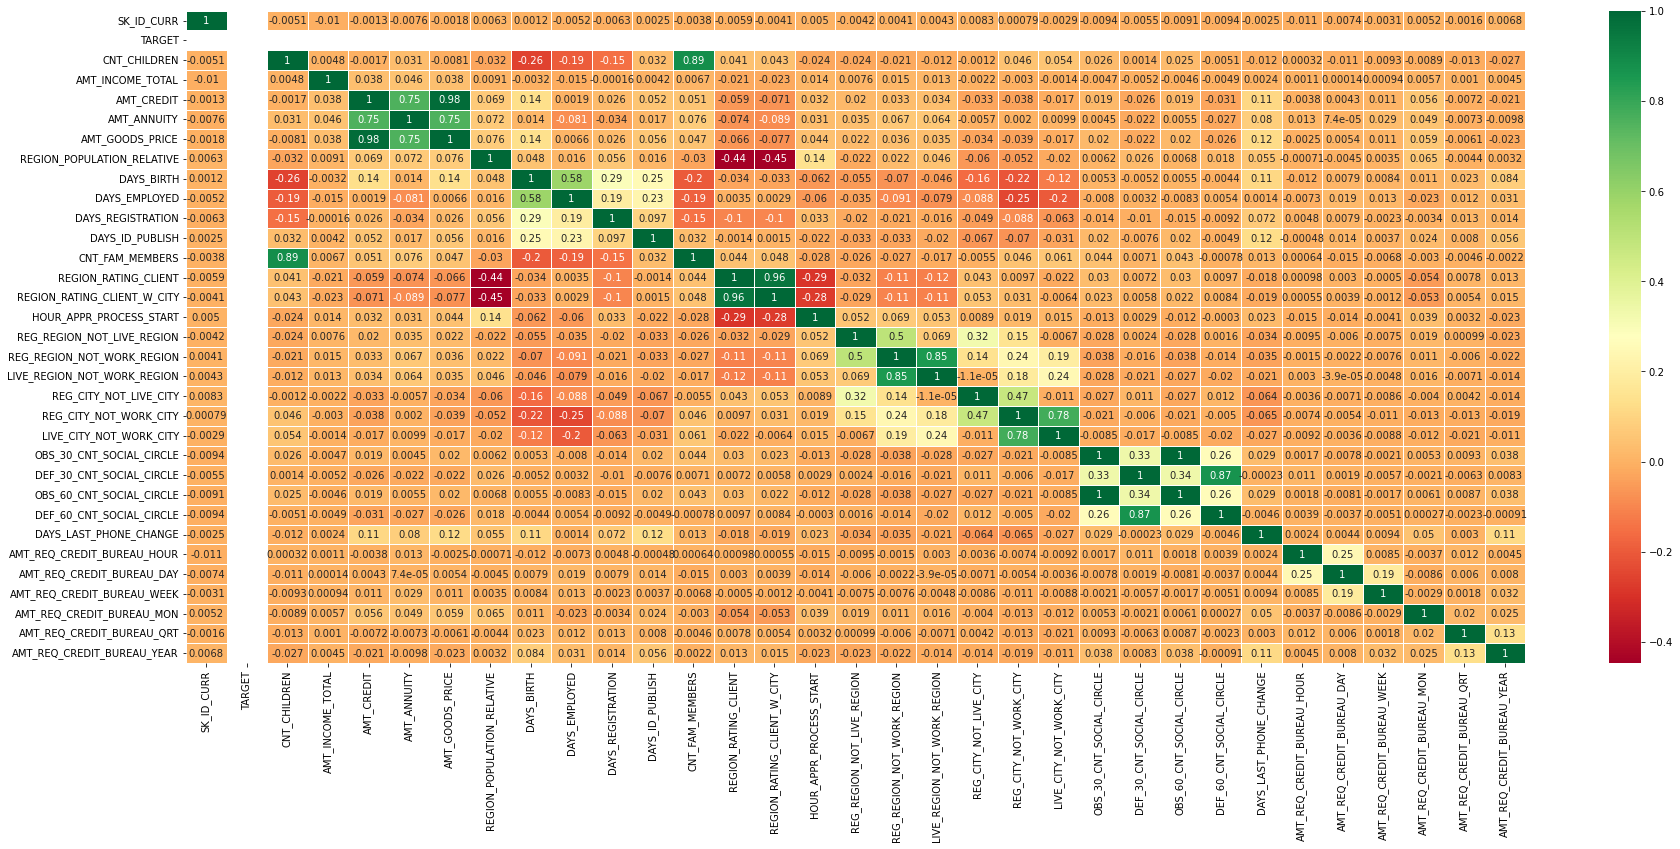

In [75]:
plt.figure(figsize=(30,12))
sns.heatmap(df_applications_1.corr(),annot=True,cmap='RdYlGn',linewidths=1)
plt.show()

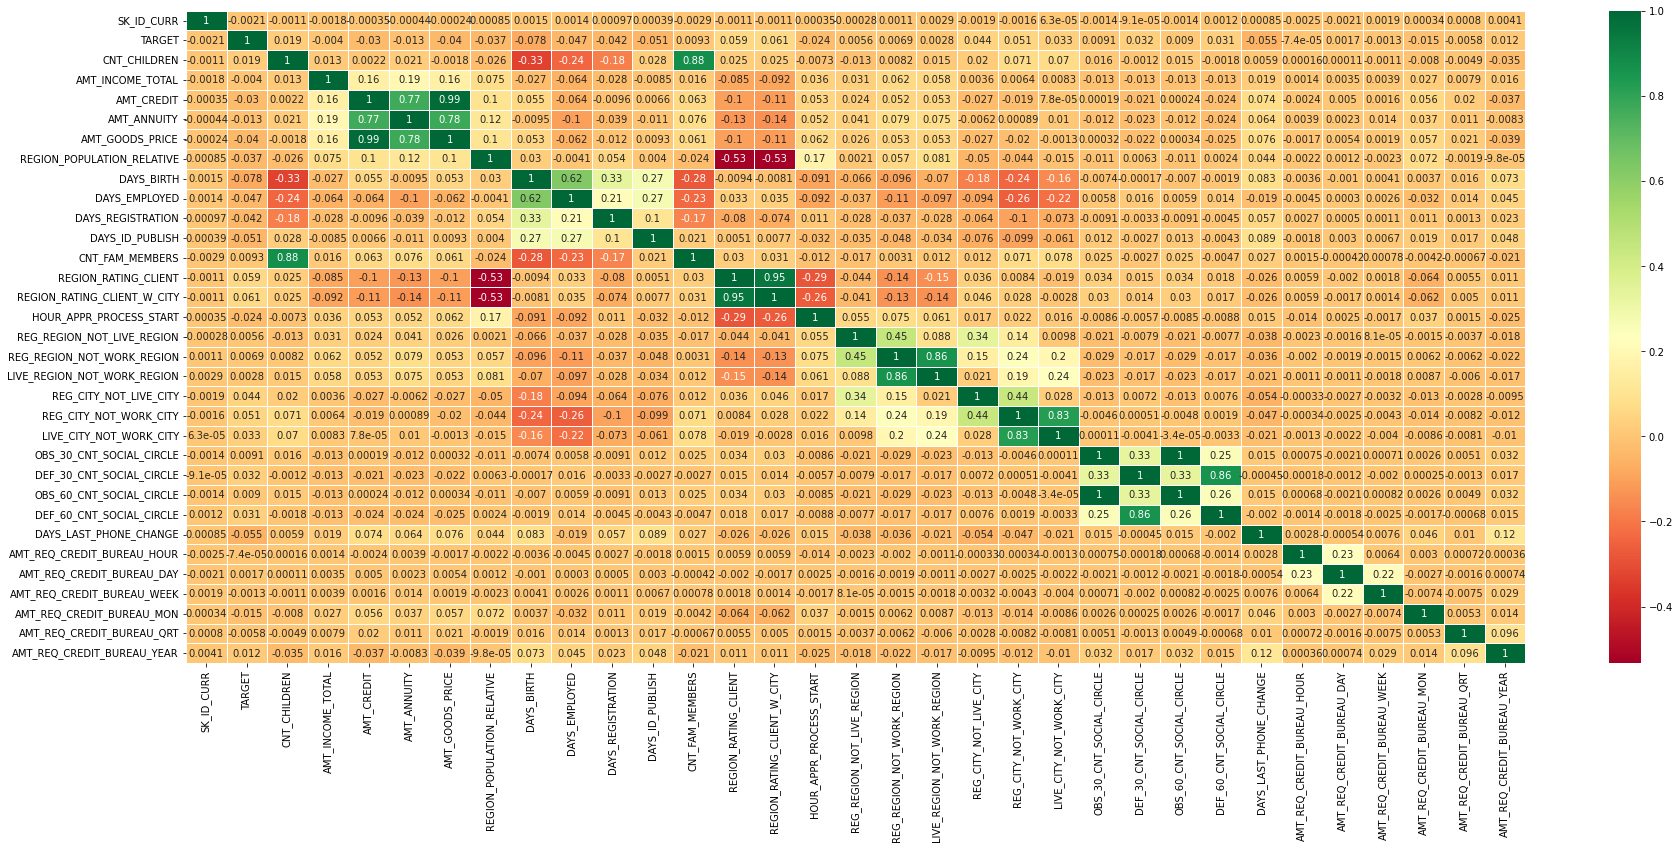

In [76]:
plt.figure(figsize=(30,12))
sns.heatmap(df_applications.corr(),annot=True,cmap='RdYlGn',linewidths=1)
plt.show()

In [77]:
#Merging Previous and Current Loan Data sets
merged_df = pd.merge(df_applications, df_previous_applications, how='inner', on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [78]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413553e+06,1.412438e+06,1.413646e+06,1.413646e+06,1.413646e+06,...,1.413646e+06,1.106438e+06,1.413646e+06,1.413645e+06,1.094130e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.106443e+06
mean,2.784832e+05,8.655632e-02,4.048758e-01,1.733153e+05,5.875603e+05,2.701726e+04,5.277191e+05,2.074942e-02,4.421432e+01,1.985574e+02,...,1.922738e+06,1.583715e+04,1.752422e+05,1.963529e+05,2.264502e+05,1.247887e+01,9.964319e-01,-8.803712e+02,3.149935e+02,1.605202e+01
std,1.028121e+05,2.811839e-01,7.173327e-01,1.985770e+05,3.849227e+05,1.395134e+04,3.532474e+05,1.334706e-02,1.190206e+01,3.926436e+02,...,5.327159e+05,1.472502e+04,2.936238e+05,3.194835e+05,3.159400e+05,3.331485e+00,5.962675e-02,7.835434e+02,7.695231e+03,1.456665e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,2.000000e+01,0.000000e+00,...,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.893670e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,3.400000e+01,2.000000e+00,...,1.461337e+06,6.257700e+03,1.975050e+04,2.487870e+04,4.982400e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,4.300000e+01,6.000000e+00,...,1.922686e+06,1.122354e+04,7.087050e+04,8.059500e+04,1.102455e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675610e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,5.400000e+01,1.700000e+01,...,2.384010e+06,2.041968e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,2.400000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,6.900000e+01,1.000000e+03,...,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [79]:
merged_df0 = merged_df[merged_df['TARGET']==0]
merged_df1 = merged_df[merged_df['TARGET']==1]

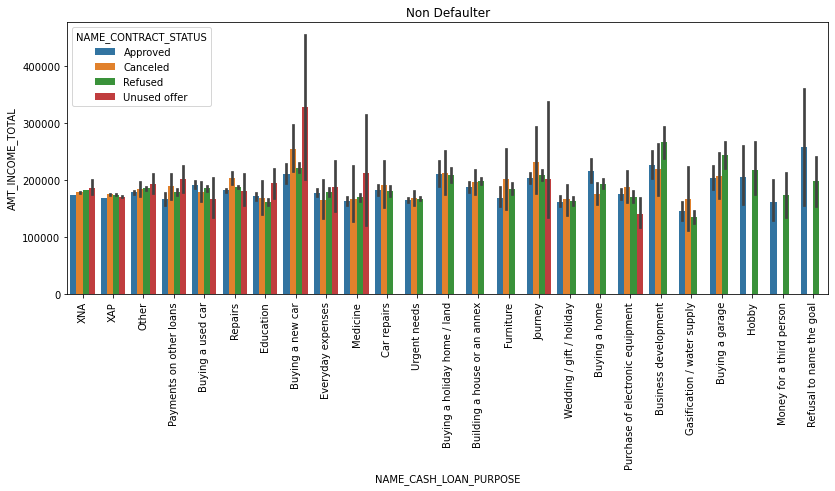

In [80]:
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)
sns.barplot(data=merged_df0,x='NAME_CASH_LOAN_PURPOSE',y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS')

plt.show()

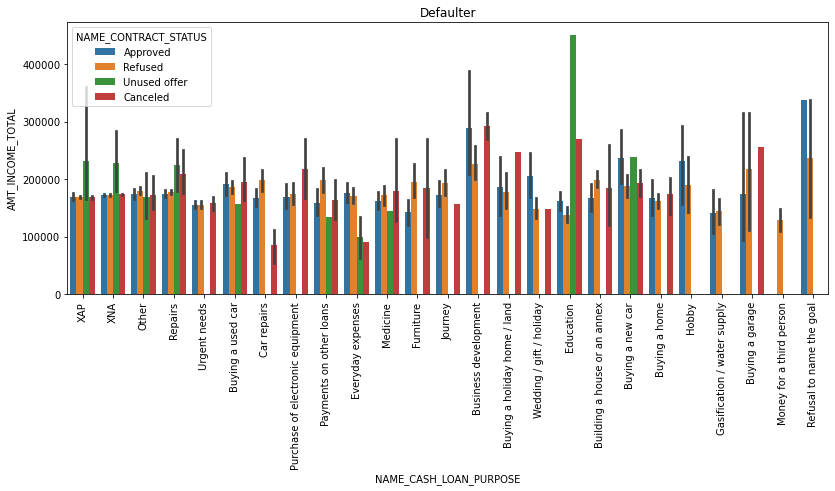

In [81]:
plt.figure(figsize=(30,5))

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)
sns.barplot(data=merged_df1,x='NAME_CASH_LOAN_PURPOSE',y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS')

plt.show()

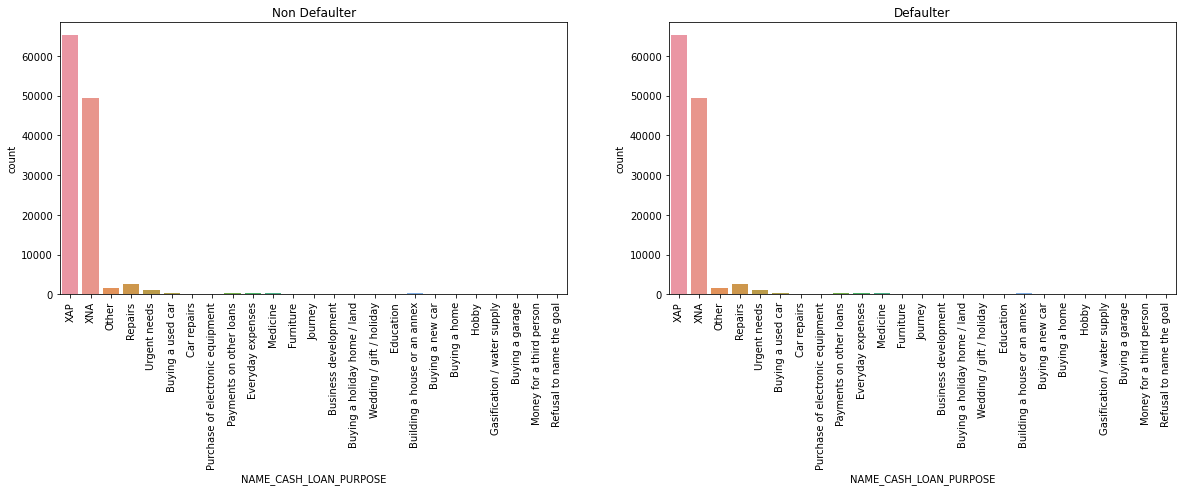

In [82]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=merged_df1)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=merged_df1)

plt.show()

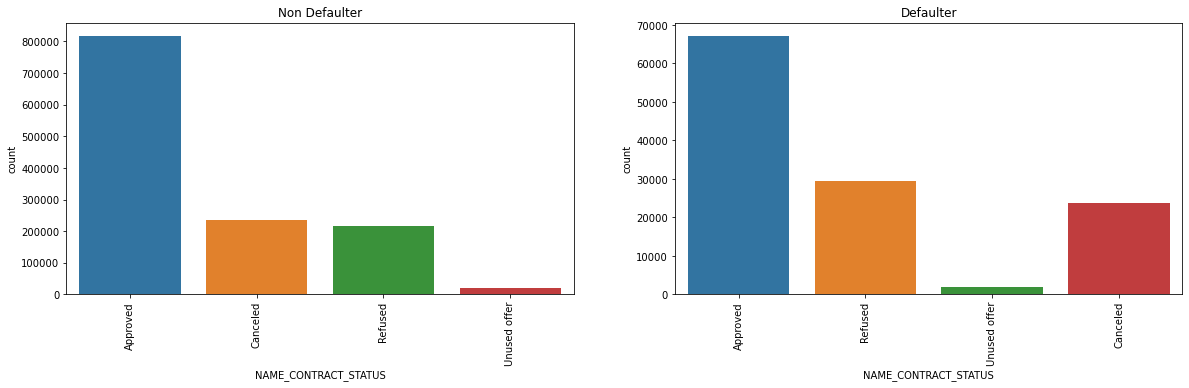

In [83]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.xticks(rotation=90)
sns.countplot(x='NAME_CONTRACT_STATUS',data=merged_df0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)
sns.countplot(x='NAME_CONTRACT_STATUS',data=merged_df1)

plt.show()

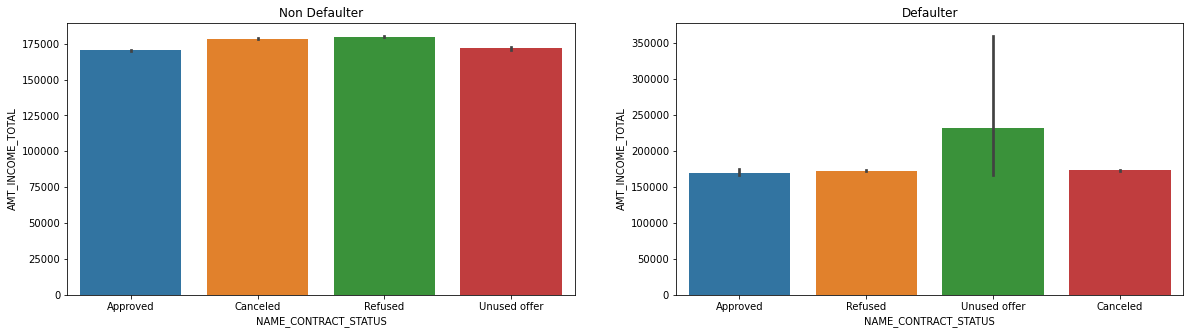

In [84]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Non Defaulter')
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',data=merged_df0)

plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',data=merged_df1)

plt.show()